In [34]:
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
line_break ="======================================================================================================================================================================="

colors = ['lightcoral', 'lightblue', 'lightgreen', 'peachpuff', 'lavender', 'mintcream', 'palegoldenrod', 'thistle', 'lightyellow', 'skyblue', 'lightpink', 'honeydew', 'lavenderblush']


In [36]:
df_makesrs = pd.read_csv('electric_vehicle_sales_by_makers.csv')

In [37]:
df_makesrs.columns

Index(['date', 'vehicle_category', 'maker', 'electric_vehicles_sold'], dtype='object')

In [38]:
df_makesrs['maker'].unique()

array(['OLA ELECTRIC', 'OKAYA EV', 'BYD India', 'PCA Automobiles',
       'BMW India', 'Volvo Auto India', 'KIA Motors', 'Mercedes -Benz AG',
       'Tata Motors', 'MG Motor', 'Mahindra & Mahindra', 'Hyundai Motor',
       'HERO ELECTRIC', 'OKINAWA', 'AMPERE', 'ATHER', 'PURE EV', 'TVS',
       'REVOLT', 'BAJAJ', 'BEING', 'JITENDRA', 'OTHERS', 'BGAUSS',
       'BATTRE ELECTRIC', 'KINETIC GREEN'], dtype=object)

# Data Overview

### Display the first few rows of the dataset.

In [39]:
df_makesrs.head()

,date,vehicle_category,maker,electric_vehicles_sold
0,01-Apr-21,2-Wheelers,OLA ELECTRIC,0
1,01-Apr-22,2-Wheelers,OKAYA EV,0
2,01-May-21,2-Wheelers,OLA ELECTRIC,0
3,01-Jun-21,2-Wheelers,OLA ELECTRIC,0
4,01-Jul-21,2-Wheelers,OLA ELECTRIC,0


### Check the shape of the dataset (number of rows and columns).

In [40]:
df_makesrs.shape

(816, 4)

### View the data types of each column.

In [41]:
df_makesrs.dtypes

date                      object
vehicle_category          object
maker                     object
electric_vehicles_sold     int64
dtype: object

### Check for missing values in the dataset.

In [42]:
df_makesrs.isna().sum()

date                      0
vehicle_category          0
maker                     0
electric_vehicles_sold    0
dtype: int64

### Get summary statistics of the electric_vehicles_sold column.

In [43]:
df_makesrs['electric_vehicles_sold'].describe()

count      816.000000
mean      2531.998775
std       4771.077333
min          0.000000
25%         42.000000
50%        662.000000
75%       2636.500000
max      44630.000000
Name: electric_vehicles_sold, dtype: float64

# Data Cleaning

### Convert the date column to a datetime format.

In [44]:
print(df_makesrs.dtypes)

print(df_makesrs['date'].head(1))

df_makesrs['date'] = pd.to_datetime(df_makesrs['date'], format='%d-%b-%y')

print(df_makesrs['date'].head(1))

print(df_makesrs.dtypes)

date                      object
vehicle_category          object
maker                     object
electric_vehicles_sold     int64
dtype: object
0    01-Apr-21
Name: date, dtype: object
0   2021-04-01
Name: date, dtype: datetime64[ns]
date                      datetime64[ns]
vehicle_category                  object
maker                             object
electric_vehicles_sold             int64
dtype: object


### Check for outliers in the electric_vehicles_sold column.

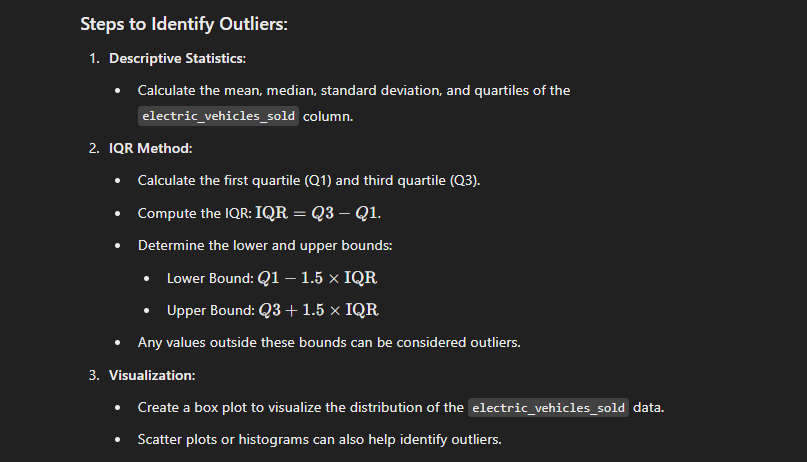

In [45]:
print(df_makesrs.columns)
print(line_break)

quantile_values  =   df_makesrs['electric_vehicles_sold'].describe()

Q1 = quantile_values.loc['25%']
Q3 = quantile_values.loc['75%']

IQR = Q3-Q1


LOWER_BOUND = Q1-1.5 * IQR
UPPER_BOUND = Q3 + 1.5 * IQR


print(f"Q1: {Q1},  Q3: {Q3}")
print(line_break)
print(f"Lower Bound: {LOWER_BOUND}, Upper Bound: {UPPER_BOUND}")
print(line_break)


Index(['date', 'vehicle_category', 'maker', 'electric_vehicles_sold'], dtype='object')
Q1: 42.0,  Q3: 2636.5
Lower Bound: -3849.75, Upper Bound: 6528.25


Outliers:
          date vehicle_category          maker  electric_vehicles_sold
359 2024-03-01       4-Wheelers    Tata Motors                    6606
380 2022-04-01       2-Wheelers   OLA ELECTRIC                   13601
381 2022-04-01       2-Wheelers        OKINAWA                   11341
382 2022-04-01       2-Wheelers  HERO ELECTRIC                    6803
383 2022-04-01       2-Wheelers         AMPERE                    6864
..         ...              ...            ...                     ...
803 2024-03-01       2-Wheelers   OLA ELECTRIC                   44630
804 2024-03-01       2-Wheelers            TVS                   26158
805 2024-03-01       2-Wheelers          ATHER                   17012
806 2024-03-01       2-Wheelers          BAJAJ                   17716
815 2024-03-01       2-Wheelers         OTHERS                   10579

[104 rows x 4 columns]


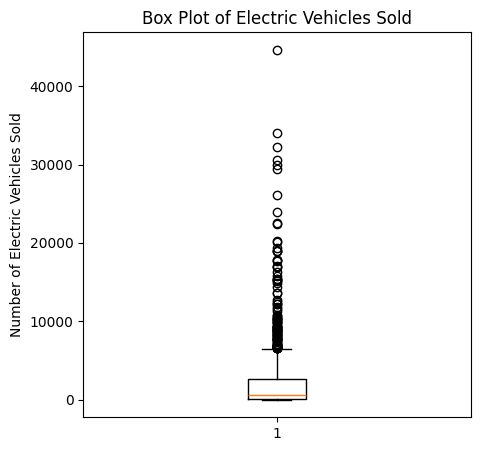

In [46]:
outliers = df_makesrs[(df_makesrs['electric_vehicles_sold'] < LOWER_BOUND) | (df_makesrs['electric_vehicles_sold'] > UPPER_BOUND)]
outliers

print("Outliers:")
print(outliers)


plt.figure(figsize=(5, 5))
plt.boxplot(df_makesrs['electric_vehicles_sold'])
plt.title('Box Plot of Electric Vehicles Sold')
plt.ylabel('Number of Electric Vehicles Sold')
plt.show()

### Plot the distribution of electric_vehicles_sold.


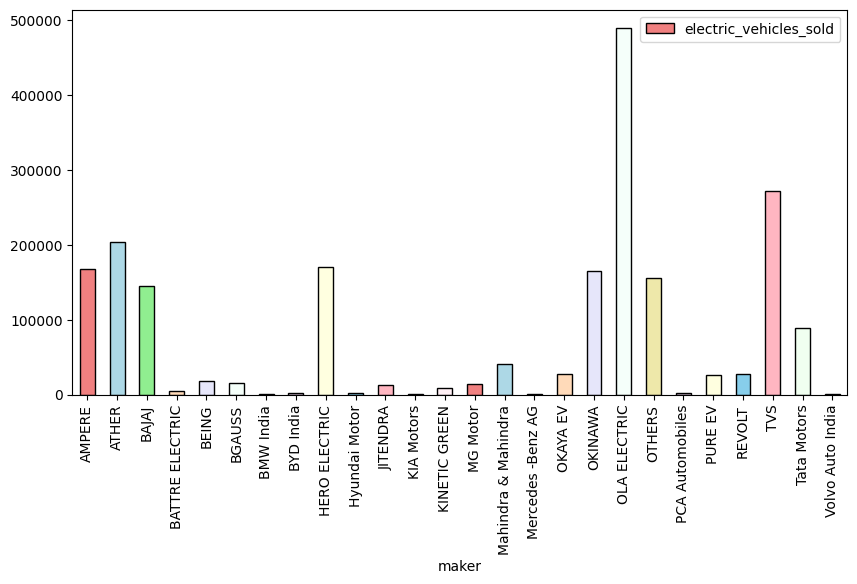

In [47]:
df_makesrs.columns

electric_vehicles_sold_total = df_makesrs[['maker','electric_vehicles_sold']].groupby('maker').sum()

type(electric_vehicles_sold_total)

electric_vehicles_sold_total.reset_index(inplace= True)

electric_vehicles_sold_total.plot(kind='bar' ,x = 'maker', y = 'electric_vehicles_sold', color=colors, edgecolor = 'black', figsize=(10,5) )
plt.show()

### Count unique values in the vehicle_category column.

In [48]:
df_makesrs['vehicle_category'].unique()

array(['2-Wheelers', '4-Wheelers'], dtype=object)

### Count unique values in the maker column.

In [49]:
df_makesrs['maker'].unique()

array(['OLA ELECTRIC', 'OKAYA EV', 'BYD India', 'PCA Automobiles',
       'BMW India', 'Volvo Auto India', 'KIA Motors', 'Mercedes -Benz AG',
       'Tata Motors', 'MG Motor', 'Mahindra & Mahindra', 'Hyundai Motor',
       'HERO ELECTRIC', 'OKINAWA', 'AMPERE', 'ATHER', 'PURE EV', 'TVS',
       'REVOLT', 'BAJAJ', 'BEING', 'JITENDRA', 'OTHERS', 'BGAUSS',
       'BATTRE ELECTRIC', 'KINETIC GREEN'], dtype=object)

### Visualize the frequency of vehicle categories using a bar chart.

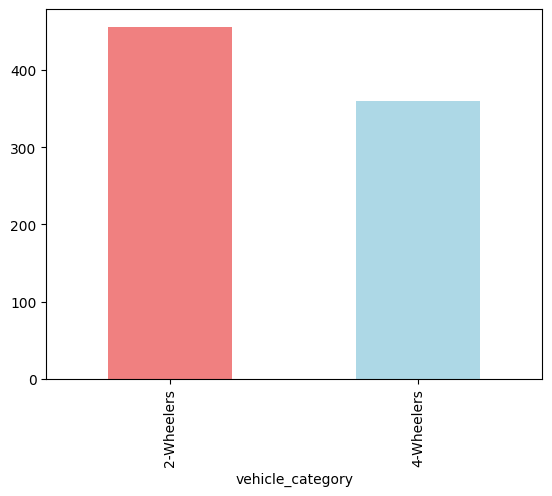

In [50]:
df_makesrs['vehicle_category'].value_counts().plot(kind='bar',color = colors)
plt.show()

### Analyze the trend of electric vehicle sales over time.


In [51]:
df_makesrs.columns

Index(['date', 'vehicle_category', 'maker', 'electric_vehicles_sold'], dtype='object')

In [52]:
df_makesrs.set_index('date', inplace=True)

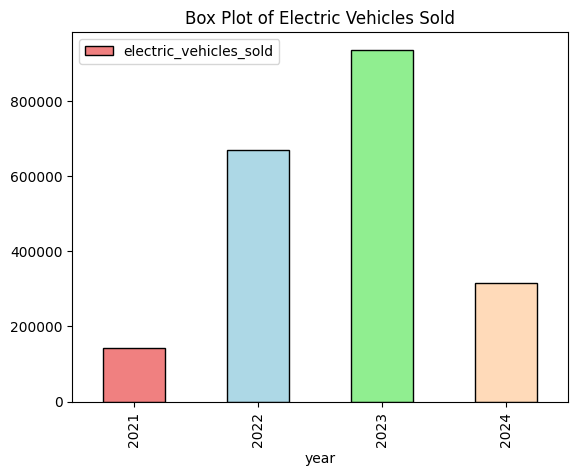

In [53]:
year_sales = df_makesrs.resample('YE')['electric_vehicles_sold'].sum().sort_index()
year_sales = pd.DataFrame(year_sales)
year_sales.reset_index(inplace=True)
year_sales['year'] = year_sales['date'].dt.year
year_sales.columns
year_sales[['year','electric_vehicles_sold']].plot(kind='bar', x= 'year', y = 'electric_vehicles_sold', color=colors, edgecolor = 'black')

plt.title('Box Plot of Electric Vehicles Sold')


plt.show()

### Group data by maker and visualize the total electric vehicles sold.



Index(['vehicle_category', 'maker', 'electric_vehicles_sold'], dtype='object')


<Axes: xlabel='maker'>

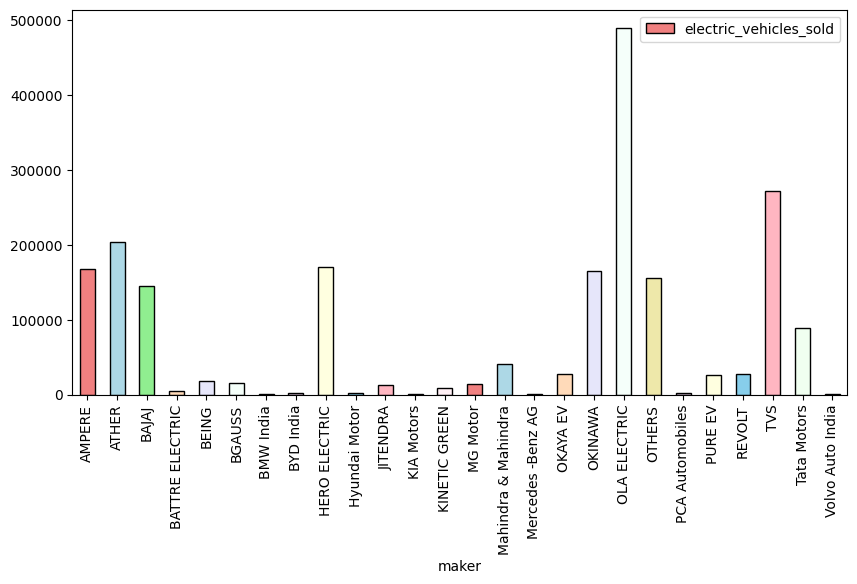

In [54]:
print(df_makesrs.columns)
print(line_break)

df_makesrs[['maker','electric_vehicles_sold']].groupby('maker').sum().reset_index().plot(kind='bar', x='maker', y='electric_vehicles_sold', figsize=(10,5),color=colors, edgecolor = 'black')

### Group data by vehicle_category and visualize total sales.

<Axes: ylabel='electric_vehicles_sold'>

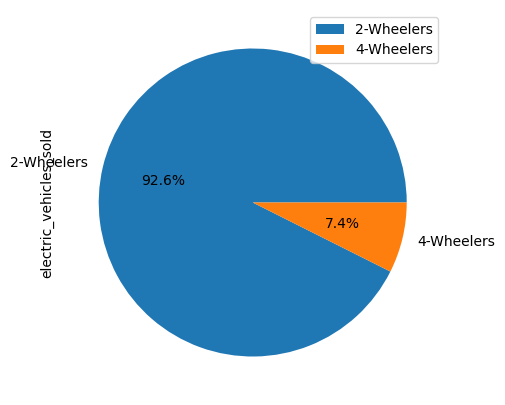

In [55]:
df_makesrs[['vehicle_category','electric_vehicles_sold']].groupby('vehicle_category').sum().plot(kind='pie',y = 'electric_vehicles_sold',autopct='%1.1f%%', figsize=(18,5) )

### Create a pivot table to summarize total sales by maker and vehicle_category.

In [56]:
print(df_makesrs.columns)
print(line_break)

piv_table = df_makesrs.pivot_table(
    values='electric_vehicles_sold',
    index='maker',
    columns='vehicle_category',
    aggfunc='sum',
    fill_value=0 
)

piv_table

Index(['vehicle_category', 'maker', 'electric_vehicles_sold'], dtype='object')


vehicle_category,2-Wheelers,4-Wheelers
maker,,
AMPERE,167274,0
ATHER,204449,0
BAJAJ,145606,0
BATTRE ELECTRIC,4841,0
BEING,18392,0
BGAUSS,15051,0
BMW India,0,1370
BYD India,0,2419
HERO ELECTRIC,170394,0


### Resample the data to monthly/quarterly and visualize the trend.


In [57]:
year_sample_df = df_makesrs.resample('YE')['electric_vehicles_sold'].sum()

print(year_sample_df)
print(line_break)


quarter_sample_df = df_makesrs.resample('QE')['electric_vehicles_sold'].sum()

print(quarter_sample_df)
print(line_break)

month_sample_df = df_makesrs.resample('ME')['electric_vehicles_sold'].sum()

print(month_sample_df)
print(line_break)


date
2021-12-31    143189
2022-12-31    669260
2023-12-31    936957
2024-12-31    316705
Freq: YE-DEC, Name: electric_vehicles_sold, dtype: int64
date
2021-06-30     13301
2021-09-30     52298
2021-12-31     77590
2022-03-31    127961
2022-06-30    148488
2022-09-30    162422
2022-12-31    230389
2023-03-31    234069
2023-06-30    239446
2023-09-30    200639
2023-12-31    262803
2024-03-31    316705
Freq: QE-DEC, Name: electric_vehicles_sold, dtype: int64
date
2021-04-30      6315
2021-05-31      1499
2021-06-30      5487
2021-07-31     15794
2021-08-31     17153
2021-09-30     19351
2021-10-31     22190
2021-11-30     26159
2021-12-31     29241
2022-01-31     31672
2022-02-28     38171
2022-03-31     58118
2022-04-30     55524
2022-05-31     45373
2022-06-30     47591
2022-07-31     50010
2022-08-31     55584
2022-09-30     56828
2022-10-31     81162
2022-11-30     80752
2022-12-31     68475
2023-01-31     68116
2023-02-28     70827
2023-03-31     95126
2023-04-30     72818
2023-05-31

### Calculate the year-over-year growth of electric vehicle sales.


In [58]:
year_sample_df = pd.DataFrame(year_sample_df)
year_sample_df.reset_index(inplace=True)

In [59]:
year_sample_df['profit'] = 0
year_sample_df

,date,electric_vehicles_sold,profit
0,2021-12-31,143189,0
1,2022-12-31,669260,0
2,2023-12-31,936957,0
3,2024-12-31,316705,0


In [60]:
length = len(year_sample_df)
length

4

In [61]:
for i in  (year_sample_df.index):
   # print(i) 
    z = i+1
    if z != length:        
        prf = year_sample_df.loc[z]['electric_vehicles_sold'] - year_sample_df.loc[i]['electric_vehicles_sold']        
        year_sample_df.loc[i, 'profit' ] = prf        
        #print(prf)
        #print(line_break)
        
    
    
year_sample_df

,date,electric_vehicles_sold,profit
0,2021-12-31,143189,526071
1,2022-12-31,669260,267697
2,2023-12-31,936957,-620252
3,2024-12-31,316705,0


### Identify seasonal patterns in electric vehicle sales.


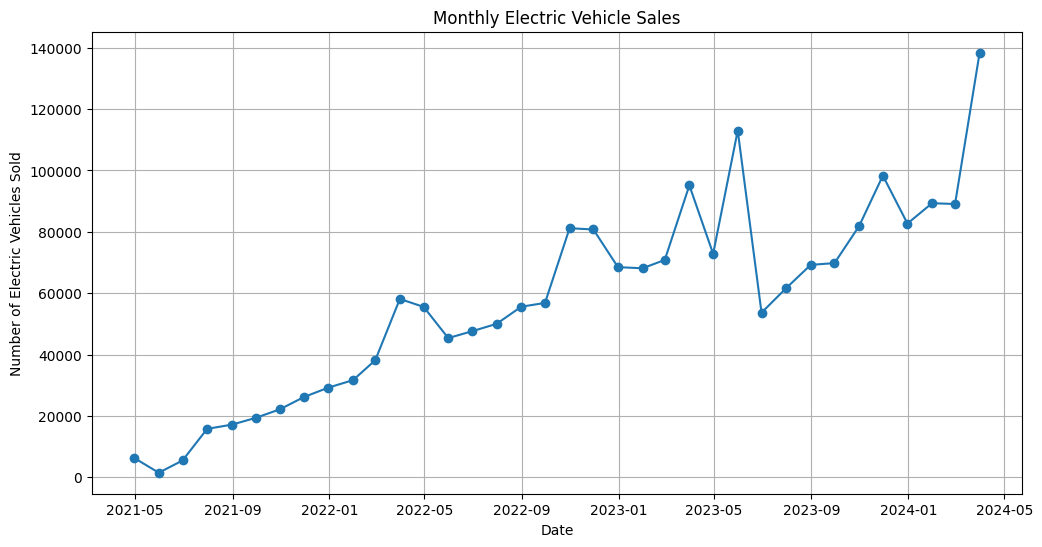

In [62]:
plt.figure(figsize=(12, 6))
plt.plot(month_sample_df, marker='o')
plt.title('Monthly Electric Vehicle Sales')
plt.xlabel('Date')
plt.ylabel('Number of Electric Vehicles Sold')
plt.grid()
plt.show()


### Visualize sales by maker using a pie chart.

In [63]:
print(df_makesrs.columns)
print(line_break)

sales_maker = df_makesrs[['maker','electric_vehicles_sold']].groupby('maker').sum().head(10)


sales_maker.sort_values(by='electric_vehicles_sold', ascending=False)

sales_maker.reset_index(inplace=True)




Index(['vehicle_category', 'maker', 'electric_vehicles_sold'], dtype='object')


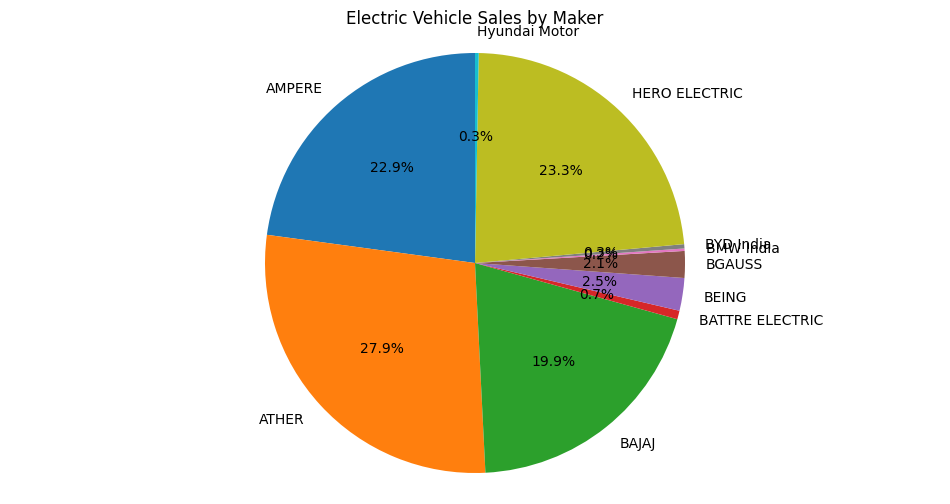

In [66]:
plt.figure(figsize=(12, 6))
plt.pie(
    sales_maker['electric_vehicles_sold'],  
    labels=sales_maker['maker'],             
    autopct='%1.1f%%',                       
    startangle=90                            
)
plt.title('Electric Vehicle Sales by Maker')
plt.axis('equal')
plt.show()